In [1]:
library(ggplot2)

In [2]:
dataFull <- read.csv("mdpv4Traj.csv", header=TRUE)
dataFull <- dataFull[dataFull$alpha <= 1, ]
print("rows")
nrow(dataFull)
print("cols")
ncol(dataFull)
print("unique alpha")
sort(unique(dataFull$alpha))

head(dataFull, 2)

[1] "rows"


[1] 95874

[1] "cols"


[1] 23

[1] "unique alpha"


[1] 0.001 0.002 0.004 0.005 0.008 0.010 0.016 0.020 0.032 0.040 0.050 0.080
[13] 0.100 0.160 0.200 0.320 0.400 0.500 0.800 1.000

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,episodes,endScoreBell,endScoreRand,aggs,backups,endScoreStochBell,endScore,diffs,avgRewArr,epsToBackup
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,0.8,0.6,1,8,10,True,3701,0,30300,⋯,300,3913.433,1043.424,3042,30300,2155.983,4074.901,0.3139591,15.97664,1010
2,10,0.8,0.6,1,8,10,True,3701,0,30300,⋯,300,3913.433,1043.424,3042,30300,2155.983,4074.901,0.5767524,13.42548,2020


[1] 6

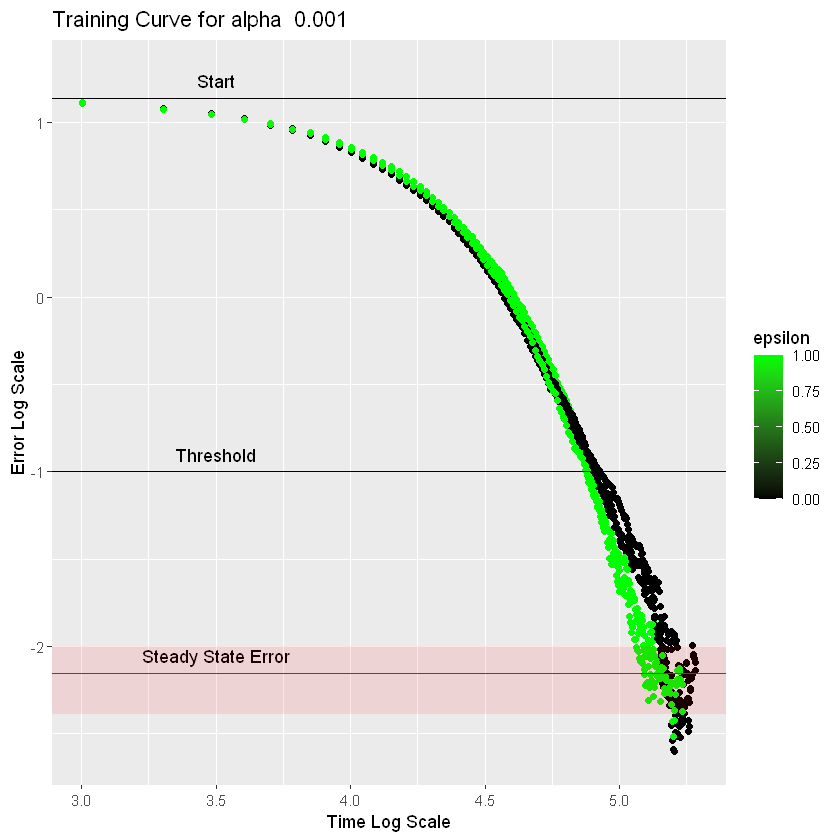

In [3]:
a = 0.001
title <- paste("Training Curve for alpha ", a)
data <- dataFull[dataFull$alpha == a & (dataFull$syncBackups == 1 | dataFull$syncBackups == -1) & dataFull$fedP == 1,]
nrow(data[data$epsToBackup == 1010,])
sqDiff = data$diffs ** 2

avgDiffs = c()

for (trial in unique(data$trial)){
    for (eps in unique(data$epsilon)){
        temp <- data[data$trial == trial & data$epsilon == eps,]
        tempTime <- max(temp$epsToBackup)
        temp <- temp[temp$epsToBackup > tempTime - 10 * 1010,]
        diff <- mean(temp$diffs ** 2)
        avgDiffs = append(avgDiffs, diff)
    }
}
# print(mean(avgDiffs))
# print(sd(avgDiffs))

time <- data$epsToBackup
p <- ggplot(data, aes(x=log10(time), y=log10(sqDiff)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(colour = epsilon))
p <- p + xlab("Time Log Scale") + ylab("Error Log Scale")
p <- p + scale_color_gradientn(colors = c("black", "green"))
p <- p + ylim(NA, log10(15) + 0.1) # needed to keep top line not grayed out
p <- p + geom_hline(yintercept=log10(0.1)) + annotate(geom="text", x=3.5, y=log10(0.1) + 0.1, label="Threshold")
p <- p + geom_hline(yintercept=log10(13.731440581206959)) + annotate(geom="text", x=3.5, y=log10(13.731440581206959) + 0.1, label="Start")
p <- p + geom_hline(yintercept=log10(mean(avgDiffs)), color="red") + annotate(geom="text", x=3.5, y=log10(mean(avgDiffs)) + 0.1, label="Steady State Error")
p <- p + geom_rect(data=data[1,], inherit.aes=FALSE, xmin=0, xmax=Inf, ymin=log10(mean(avgDiffs) - sd(avgDiffs)), ymax=log10(mean(avgDiffs) + sd(avgDiffs)), fill="red", alpha=0.1) # steady state error sd
p

# ggsave(filename=paste("graphs/", title, ".png"), plot=p, device="png")

[1] 6

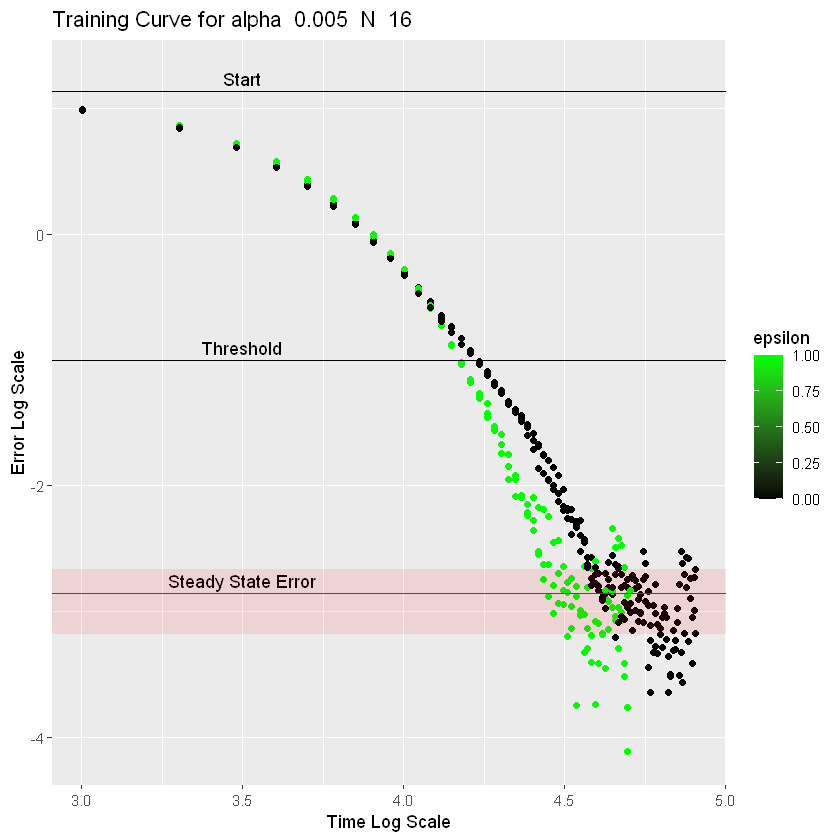

In [4]:
a = 0.005
N = 16
title <- paste("Training Curve for alpha ", a, " N ", N)
data <- dataFull[dataFull$alpha == a & (dataFull$syncBackups == 1 | dataFull$syncBackups == -1) & dataFull$fedP == N,]
nrow(data[data$epsToBackup == 1010,])
sqDiff = data$diffs ** 2

avgDiffs = c()
for (trial in unique(data$trial)){
    for (eps in unique(data$epsilon)){
        temp <- data[data$trial == trial & data$epsilon == eps,]
        tempTime <- max(temp$epsToBackup)
        temp <- temp[temp$epsToBackup > tempTime - 10 * 1010,]
        diff <- mean(temp$diffs ** 2)
        avgDiffs = append(avgDiffs, diff)
    }
}

time <- data$epsToBackup
p <- ggplot(data, aes(x=log10(time), y=log10(sqDiff)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(colour = epsilon))
p <- p + xlab("Time Log Scale") + ylab("Error Log Scale")
p <- p + scale_color_gradientn(colors = c("black", "green"))
p <- p + ylim(NA, log10(15) + 0.1) # needed to keep top line not grayed out
p <- p + geom_hline(yintercept=log10(0.1)) + annotate(geom="text", x=3.5, y=log10(0.1) + 0.1, label="Threshold")
p <- p + geom_hline(yintercept=log10(13.731440581206959)) + annotate(geom="text", x=3.5, y=log10(13.731440581206959) + 0.1, label="Start")
p <- p + geom_hline(yintercept=log10(mean(avgDiffs)), color="red") + annotate(geom="text", x=3.5, y=log10(mean(avgDiffs)) + 0.1, label="Steady State Error")
p <- p + geom_rect(data=data[1,], inherit.aes=FALSE, xmin=0, xmax=Inf, ymin=log10(mean(avgDiffs) - sd(avgDiffs)), ymax=log10(mean(avgDiffs) + sd(avgDiffs)), fill="red", alpha=0.1) # steady state error sd
p

[1] 6

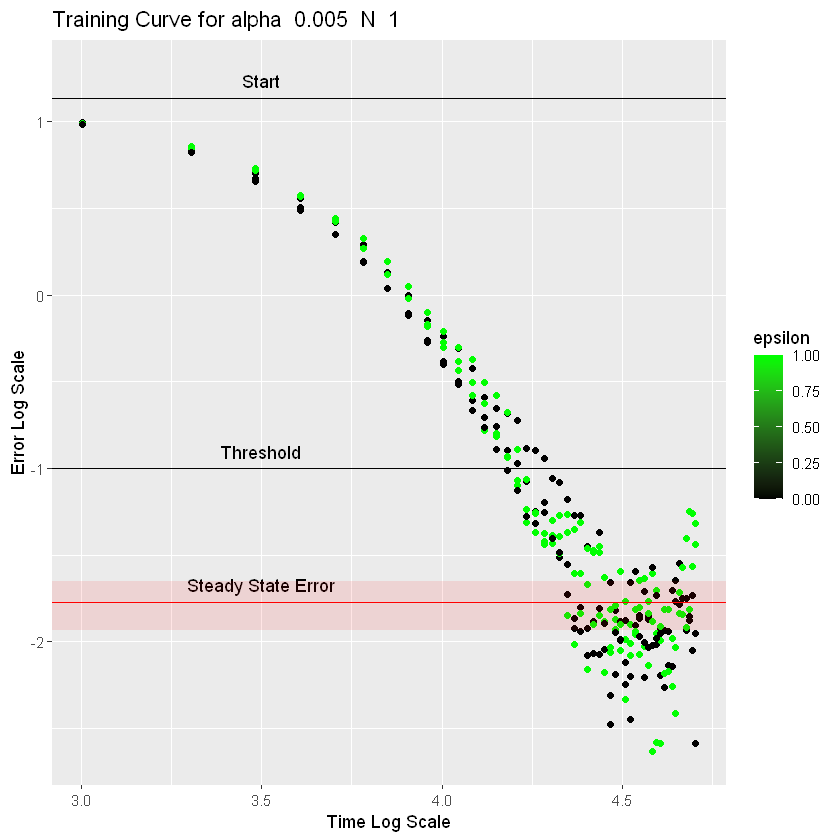

In [5]:
a = 0.005
N = 1
title <- paste("Training Curve for alpha ", a, " N ", N)
data <- dataFull[dataFull$alpha == a & (dataFull$syncBackups == 1 | dataFull$syncBackups == -1) & dataFull$fedP == N,]
nrow(data[data$epsToBackup == 1010,])
sqDiff = data$diffs ** 2

avgDiffs = c()
for (trial in unique(data$trial)){
    for (eps in unique(data$epsilon)){
        temp <- data[data$trial == trial & data$epsilon == eps,]
        tempTime <- max(temp$epsToBackup)
        temp <- temp[temp$epsToBackup > tempTime - 10 * 1010,]
        diff <- mean(temp$diffs ** 2)
        avgDiffs = append(avgDiffs, diff)
    }
}

time <- data$epsToBackup
p <- ggplot(data, aes(x=log10(time), y=log10(sqDiff)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(colour = epsilon))
p <- p + xlab("Time Log Scale") + ylab("Error Log Scale")
p <- p + scale_color_gradientn(colors = c("black", "green"))
p <- p + ylim(NA, log10(15) + 0.1) # needed to keep top line not grayed out
p <- p + geom_hline(yintercept=log10(0.1)) + annotate(geom="text", x=3.5, y=log10(0.1) + 0.1, label="Threshold")
p <- p + geom_hline(yintercept=log10(13.731440581206959)) + annotate(geom="text", x=3.5, y=log10(13.731440581206959) + 0.1, label="Start")
p <- p + geom_hline(yintercept=log10(mean(avgDiffs)), color="red") + annotate(geom="text", x=3.5, y=log10(mean(avgDiffs)) + 0.1, label="Steady State Error")
p <- p + geom_rect(data=data[1,], inherit.aes=FALSE, xmin=0, xmax=Inf, ymin=log10(mean(avgDiffs) - sd(avgDiffs)), ymax=log10(mean(avgDiffs) + sd(avgDiffs)), fill="red", alpha=0.1) # steady state error sd
p

[1] 6

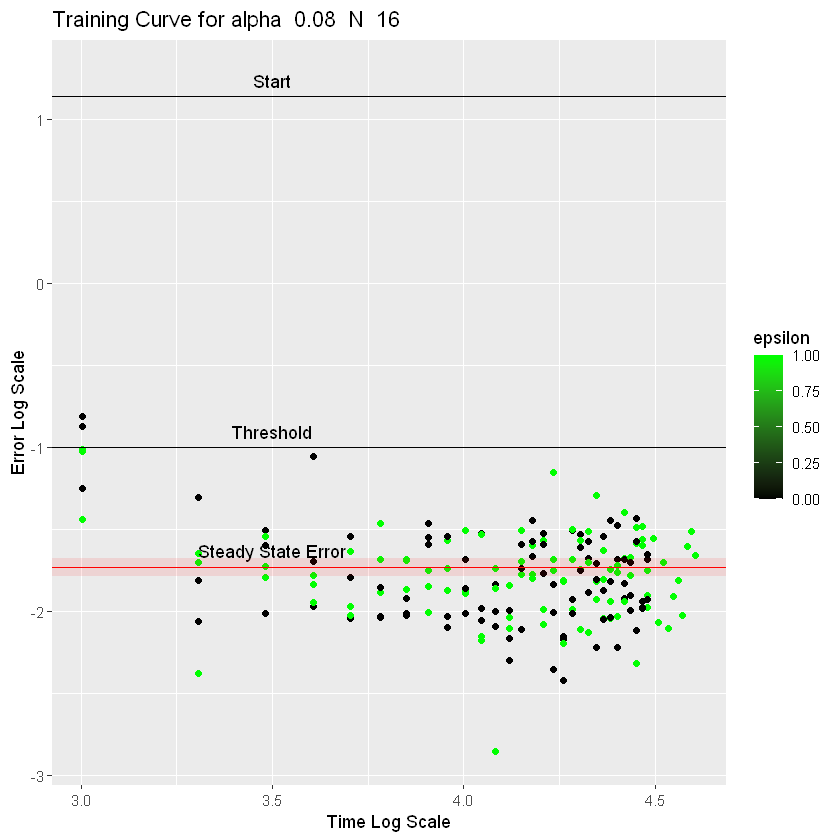

In [6]:
a = 0.08
N = 16
title <- paste("Training Curve for alpha ", a, " N ", N)
data <- dataFull[dataFull$alpha == a & (dataFull$syncBackups == 1 | dataFull$syncBackups == -1) & dataFull$fedP == N,]
nrow(data[data$epsToBackup == 1010,])
sqDiff = data$diffs ** 2

avgDiffs = c()
for (trial in unique(data$trial)){
    for (eps in unique(data$epsilon)){
        temp <- data[data$trial == trial & data$epsilon == eps,]
        tempTime <- max(temp$epsToBackup)
        temp <- temp[temp$epsToBackup > tempTime - 10 * 1010,]
        diff <- mean(temp$diffs ** 2)
        avgDiffs = append(avgDiffs, diff)
    }
}

time <- data$epsToBackup
p <- ggplot(data, aes(x=log10(time), y=log10(sqDiff)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(colour = epsilon))
p <- p + xlab("Time Log Scale") + ylab("Error Log Scale")
p <- p + scale_color_gradientn(colors = c("black", "green"))
p <- p + ylim(NA, log10(15) + 0.1) # needed to keep top line not grayed out
p <- p + geom_hline(yintercept=log10(0.1)) + annotate(geom="text", x=3.5, y=log10(0.1) + 0.1, label="Threshold")
p <- p + geom_hline(yintercept=log10(13.731440581206959)) + annotate(geom="text", x=3.5, y=log10(13.731440581206959) + 0.1, label="Start")
p <- p + geom_hline(yintercept=log10(mean(avgDiffs)), color="red") + annotate(geom="text", x=3.5, y=log10(mean(avgDiffs)) + 0.1, label="Steady State Error")
p <- p + geom_rect(data=data[1,], inherit.aes=FALSE, xmin=0, xmax=Inf, ymin=log10(mean(avgDiffs) - sd(avgDiffs)), ymax=log10(mean(avgDiffs) + sd(avgDiffs)), fill="red", alpha=0.1) # steady state error sd
p

[1] 6

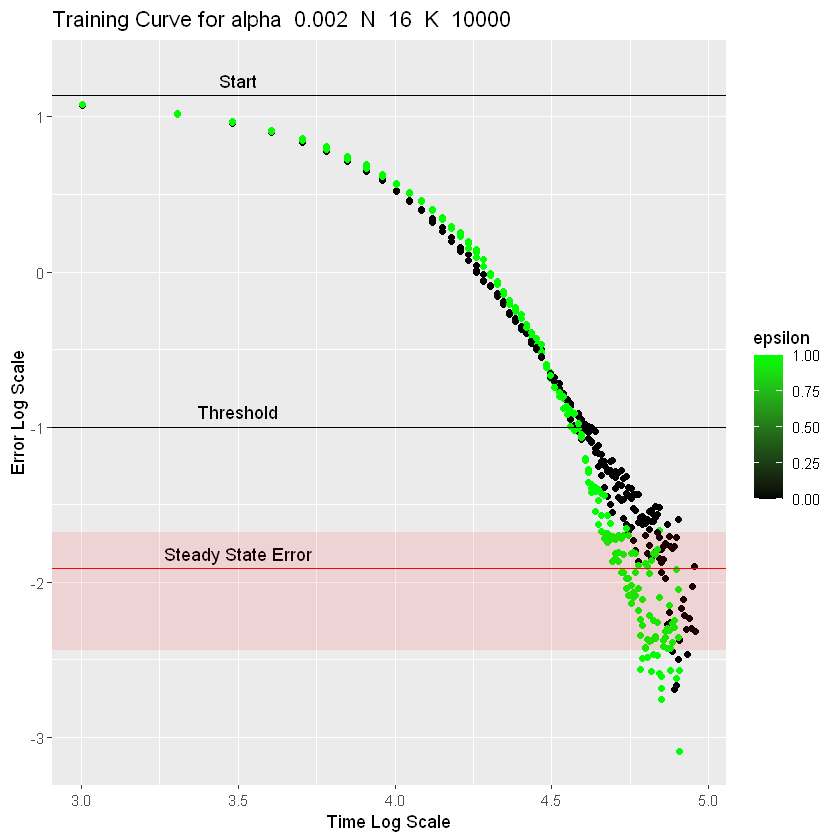

In [7]:
a = 0.002
N = 16
K = 10000
# a = a * N
title <- paste("Training Curve for alpha ", a, " N ", N, " K ", K)
data <- dataFull[dataFull$alpha == a & (dataFull$syncBackups == K | dataFull$syncBackups == -1) & dataFull$fedP == N,]
nrow(data[data$epsToBackup == 1010,])
sqDiff = data$diffs ** 2

avgDiffs = c()
for (trial in unique(data$trial)){
    for (eps in unique(data$epsilon)){
        temp <- data[data$trial == trial & data$epsilon == eps,]
        tempTime <- max(temp$epsToBackup)
        temp <- temp[temp$epsToBackup > tempTime - 10 * 1010,]
        diff <- mean(temp$diffs ** 2)
        avgDiffs = append(avgDiffs, diff)
    }
}

time <- data$epsToBackup
p <- ggplot(data, aes(x=log10(time), y=log10(sqDiff)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(colour = epsilon))
p <- p + xlab("Time Log Scale") + ylab("Error Log Scale")
p <- p + scale_color_gradientn(colors = c("black", "green"))
p <- p + ylim(NA, log10(15) + 0.1) # needed to keep top line not grayed out
p <- p + geom_hline(yintercept=log10(0.1)) + annotate(geom="text", x=3.5, y=log10(0.1) + 0.1, label="Threshold")
p <- p + geom_hline(yintercept=log10(13.731440581206959)) + annotate(geom="text", x=3.5, y=log10(13.731440581206959) + 0.1, label="Start")
p <- p + geom_hline(yintercept=log10(mean(avgDiffs)), color="red") + annotate(geom="text", x=3.5, y=log10(mean(avgDiffs)) + 0.1, label="Steady State Error")
p <- p + geom_rect(data=data[1,], inherit.aes=FALSE, xmin=0, xmax=Inf, ymin=log10(mean(avgDiffs) - sd(avgDiffs)), ymax=log10(mean(avgDiffs) + sd(avgDiffs)), fill="red", alpha=0.1) # steady state error sd
p

[1] 15

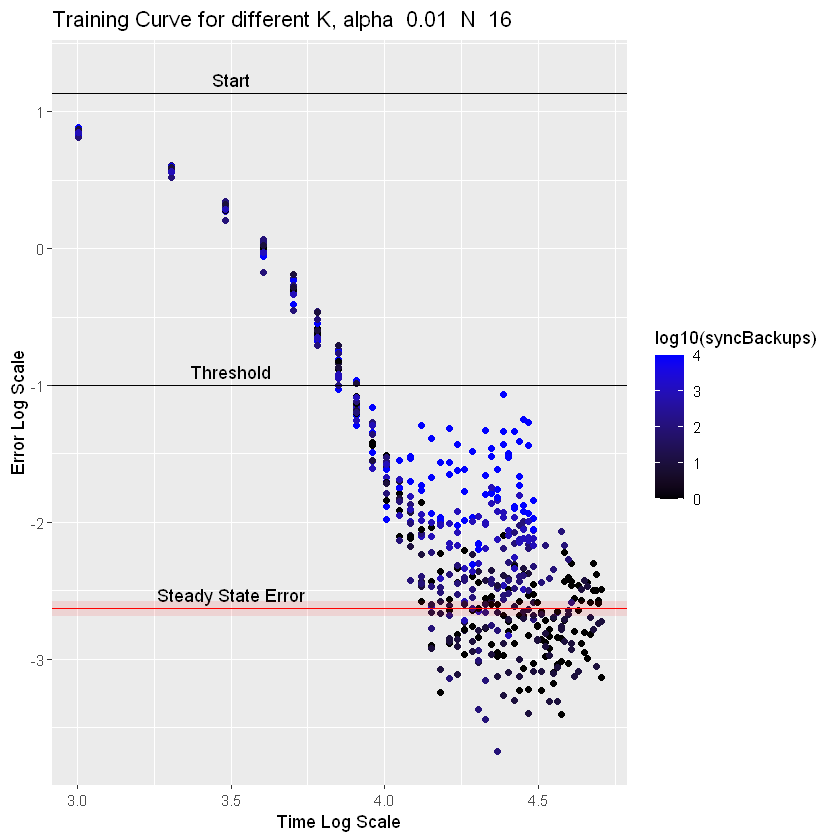

In [8]:
a = 0.01
N = 16
# a = a * N
title <- paste("Training Curve for different K, alpha ", a, " N ", N)
data <- dataFull[dataFull$alpha == a & dataFull$fedP == N & dataFull$epsilon == 1,]
data$syncBackups[data$syncBackups == -1] <- 1
nrow(data[data$epsToBackup == 1010,])
sqDiff = data$diffs ** 2

avgDiffs = c()
for (trial in unique(data$trial)){
    for (eps in unique(data$epsilon)){
        temp <- data[data$trial == trial & data$epsilon == eps,]
        tempTime <- max(temp$epsToBackup)
        temp <- temp[temp$epsToBackup > tempTime - 10 * 1010,]
        diff <- mean(temp$diffs ** 2)
        avgDiffs = append(avgDiffs, diff)
    }
}

time <- data$epsToBackup
p <- ggplot(data, aes(x=log10(time), y=log10(sqDiff)))
p <- p + ggtitle(title)
p <- p + geom_point(aes(colour = log10(syncBackups)))
p <- p + xlab("Time Log Scale") + ylab("Error Log Scale")
p <- p + scale_color_gradientn(colors = c("black", "blue"))
p <- p + ylim(NA, log10(15) + 0.1) # needed to keep top line not grayed out
p <- p + geom_hline(yintercept=log10(0.1)) + annotate(geom="text", x=3.5, y=log10(0.1) + 0.1, label="Threshold")
p <- p + geom_hline(yintercept=log10(13.731440581206959)) + annotate(geom="text", x=3.5, y=log10(13.731440581206959) + 0.1, label="Start")
p <- p + geom_hline(yintercept=log10(mean(avgDiffs)), color="red") + annotate(geom="text", x=3.5, y=log10(mean(avgDiffs)) + 0.1, label="Steady State Error")
p <- p + geom_rect(data=data[1,], inherit.aes=FALSE, xmin=0, xmax=Inf, ymin=log10(mean(avgDiffs) - sd(avgDiffs)), ymax=log10(mean(avgDiffs) + sd(avgDiffs)), fill="red", alpha=0.1) # steady state error sd
p

In [9]:
as = list(0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 1)
Ns = list(1, 2, 4, 8, 16)
Ks = list(1, 10, 100, 1000, 10000)

for (a in as){
    for (N in Ns){
        for (K in Ks) {
# a = a * N
            if (N == 1 & K != 1){
                next
            }
            title <- paste("Training Curve for alpha ", a, " N ", N, " K ", K)
            data <- dataFull[dataFull$alpha == a & (dataFull$syncBackups == K | dataFull$syncBackups == -1) & dataFull$fedP == N,]
            nrow(data[data$epsToBackup == 1010,])
            sqDiff = data$diffs ** 2
            
            avgDiffs = c()
            for (trial in unique(data$trial)){
                for (eps in unique(data$epsilon)){
                    temp <- data[data$trial == trial & data$epsilon == eps,]
                    tempTime <- max(temp$epsToBackup)
                    temp <- temp[temp$epsToBackup > tempTime - 10 * 1010,]
                    diff <- mean(temp$diffs ** 2)
                    avgDiffs = append(avgDiffs, diff)
                }
            }

            time <- data$epsToBackup
            p <- ggplot(data, aes(x=log10(time), y=log10(sqDiff)))
            p <- p + ggtitle(title)
            p <- p + geom_point(aes(colour = epsilon))
            p <- p + xlab("Time Log Scale") + ylab("Error Log Scale")
            p <- p + scale_color_gradientn(colors = c("black", "green"))
            p <- p + ylim(NA, log10(15) + 0.1) # needed to keep top line not grayed out
            p <- p + geom_hline(yintercept=log10(0.1)) + annotate(geom="text", x=3.5, y=log10(0.1) + 0.1, label="Threshold")
            p <- p + geom_hline(yintercept=log10(13.731440581206959)) + annotate(geom="text", x=3.5, y=log10(13.731440581206959) + 0.1, label="Start")
            p <- p + geom_hline(yintercept=log10(mean(avgDiffs)), color="red") + annotate(geom="text", x=3.5, y=log10(mean(avgDiffs)) + 0.1, label="Steady State Error")
            p <- p + geom_rect(data=data[1,], inherit.aes=FALSE, xmin=0, xmax=Inf, ymin=log10(mean(avgDiffs) - sd(avgDiffs)), ymax=log10(mean(avgDiffs) + sd(avgDiffs)), fill="red", alpha=0.1) # steady state error sd
            ggsave(filename=paste("graphs/", title, ".png"), plot=p, device="png")
            
        }
    }
}

for (at in as){
    for (N in Ns){
        a = at * N
        if (a >= 1 | a %in% as)
            next
        
        for (K in Ks) {
            
            if (N == 1 & K != 1){
                next
            }
# a = a * N
            title <- paste("Training Curve for alpha ", a, " N ", N, " K ", K)
            data <- dataFull[dataFull$alpha == a & (dataFull$syncBackups == K | dataFull$syncBackups == -1) & dataFull$fedP == N,]
            nrow(data[data$epsToBackup == 1010,])
            sqDiff = data$diffs ** 2
            
            avgDiffs = c()
            for (trial in unique(data$trial)){
                for (eps in unique(data$epsilon)){
                    temp <- data[data$trial == trial & data$epsilon == eps,]
                    tempTime <- max(temp$epsToBackup)
                    temp <- temp[temp$epsToBackup > tempTime - 10 * 1010,]
                    diff <- mean(temp$diffs ** 2)
                    avgDiffs = append(avgDiffs, diff)
                }
            }

            time <- data$epsToBackup
            p <- ggplot(data, aes(x=log10(time), y=log10(sqDiff)))
            p <- p + ggtitle(title)
            p <- p + geom_point(aes(colour = epsilon))
            p <- p + xlab("Time Log Scale") + ylab("Error Log Scale")
            p <- p + scale_color_gradientn(colors = c("black", "green"))
            p <- p + ylim(NA, log10(15) + 0.1) # needed to keep top line not grayed out
            p <- p + geom_hline(yintercept=log10(0.1)) + annotate(geom="text", x=3.5, y=log10(0.1) + 0.1, label="Threshold")
            p <- p + geom_hline(yintercept=log10(13.731440581206959)) + annotate(geom="text", x=3.5, y=log10(13.731440581206959) + 0.1, label="Start")
            p <- p + geom_hline(yintercept=log10(mean(avgDiffs)), color="red") + annotate(geom="text", x=3.5, y=log10(mean(avgDiffs)) + 0.1, label="Steady State Error")
            p <- p + geom_rect(data=data[1,], inherit.aes=FALSE, xmin=0, xmax=Inf, ymin=log10(mean(avgDiffs) - sd(avgDiffs)), ymax=log10(mean(avgDiffs) + sd(avgDiffs)), fill="red", alpha=0.1) # steady state error sd
            ggsave(filename=paste("graphs/", title, ".png"), plot=p, device="png")
            
        }
    }
}

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Warning message in list2(linejoin = linejoin, na.rm = na.rm, ...):
"NaNs produced"
Saving 6.67 x 6.67 in image
Warning message:
"Removed 1 rows containing missing values (`geom_rect()`)."
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Warning message in list2(linejoin = linejoin, na.rm = na.rm, ...):
"NaNs produced"
Saving 6.67 x 6.67 in image
Warning message:
"Removed 1 r